In [475]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

In [476]:
df = pd.read_csv('/Users/anshulpattoo/Desktop/CISC 251/Project/Python scripts/Spreadsheets/modifiedwinners.csv', index_col=0)
data = df.iloc[:, :df.shape[1] - 1]
data = StandardScaler().fit_transform(data)

In [477]:
from sklearn.mixture import GaussianMixture

#Fit the clustering algorithm to the dataset.
EM = GaussianMixture(n_components = 2) 
EM.fit(data)

clusters = EM.predict(data)

# clusters = EM.predict_proba(data)

# clusters = clusters.tolist()
# for i in range(len(clusters)):
#     clusters[i] = max(clusters[i])
# clusters

In [478]:
from sklearn.decomposition import PCA

#I want a PCA: two principal components.
pca = PCA(n_components = 2)

principalComponents = pca.fit_transform(data)

principalDf = pd.DataFrame(data = principalComponents, columns = ["PC1", "PC2"])
principalDf

,PC1,PC2
0,-0.391904,5.847617
1,-3.757130,-4.052213
2,2.175487,-2.023427
3,9.950755,3.368026
4,12.201385,1.831369
...,...,...
426,6.344603,-1.772570
427,-4.140516,-2.732258
428,-2.684440,-2.921564
429,2.440453,-3.591181


In [479]:
clustersDf = principalDf.assign(clusters = clusters)
clustersDf

,PC1,PC2,clusters
0,-0.391904,5.847617,1
1,-3.757130,-4.052213,1
2,2.175487,-2.023427,0
3,9.950755,3.368026,0
4,12.201385,1.831369,0
...,...,...,...
426,6.344603,-1.772570,0
427,-4.140516,-2.732258,1
428,-2.684440,-2.921564,1
429,2.440453,-3.591181,0


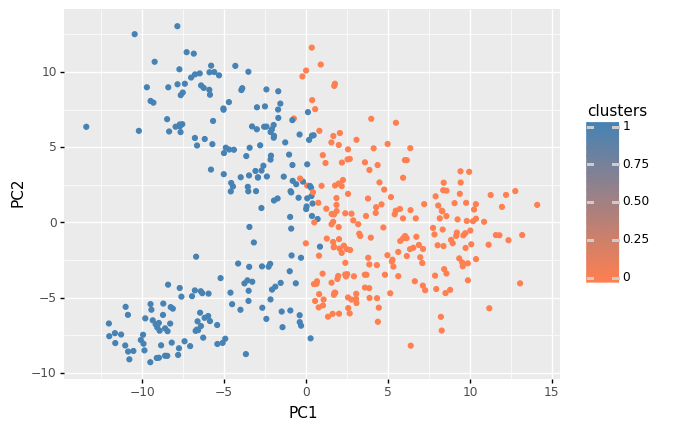

<ggplot: (305103259)>

In [480]:
from plotnine import *
ggplot(clustersDf, aes(x = "PC1", y = "PC2", color = "clusters")) + geom_point() + scale_colour_gradient(low="coral", high="steelblue")